## Back propagation 

Step 1: Import Libraries
First, we need to import the necessary libraries. We'll be using TensorFlow for building our neural networks, NumPy for data manipulation, and Matplotlib for visualizing our results.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


Step 2: Load the MNIST Dataset
We'll load the MNIST digit dataset using the mnist.load_data() function from the Keras library. The dataset consists of 60,000 training images and 10,000 testing images, each of size 28x28 pixels.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Step 3: Split the Dataset into Training and Testing Sets
We'll split the dataset into training and testing sets, with 80% of the data for training and 20% for testing.

In [ ]:
train_size = int(0.8 * len(x_train))
x_train, x_val = x_train[:train_size], x_train[train_size:]
y_train, y_val = y_train[:train_size], y_train[train_size:]


Step 4: Data Preprocessing
We'll normalize the input data by scaling it between 0 and 1. We'll also convert the labels to one-hot encoded vectors.

In [ ]:
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


Step 5: Build the Models
We'll build two models - one without backpropagation and one with backpropagation.

The model without backpropagation is a simple neural network with one hidden layer of 128 neurons and a softmax output layer.

In [ ]:
model_no_backprop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


The model with backpropagation is a deep neural network with three hidden layers of 256, 128, and 64 neurons, respectively, and a softmax output layer.


In [ ]:
model_with_backprop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


Step 6: Compile the Models
We'll compile both models using the categorical cross-entropy loss function and the Adam optimizer. We'll also measure the accuracy of the models during training.

In [ ]:
model_no_backprop.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

model_with_backprop.compile(loss='categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])


Step 7: Train the Models
We'll train both models using the fit() method. We'll set the batch size to 128 and train the models for 10 epochs.

In [ ]:
modelNoBackprop = model_no_backprop.fit(x_train,y_train,epochs = 10,batch_size = 128, validation_data=(x_val,y_val) )
modelWithBackprop = model_with_backprop.fit(x_train,y_train,epochs = 10,batch_size = 128, validation_data=(x_val,y_val) )

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.3922 - accuracy: 0.8923 - val_loss: 0.2133 - val_accuracy: 0.9408
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1865 - accuracy: 0.9460 - val_loss: 0.1583 - val_accuracy: 0.9554
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1344 - accuracy: 0.9613 - val_loss: 0.1279 - val_accuracy: 0.9628
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1056 - accuracy: 0.9697 - val_loss: 0.1119 - val_accuracy: 0.9676
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0854 - accuracy: 0.9754 - val_loss: 0.0994 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0710 - accuracy: 0.9796 - val_loss: 0.0993 - val_accuracy: 0.9707
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0598 - accuracy: 0.9830 - val_loss: 0.0887 - val_accuracy: 0.9728
Epo

Step 8: Evaluating and comparing the accuracy of the models

In [ ]:
test_loss1, test_acc1 = model_no_backprop.evaluate(x_test, y_test)
test_loss2, test_acc2 = model_with_backprop.evaluate(x_test, y_test)

print("Model Without Backpropagation:")
print("Test Loss:", test_loss1)
print("Test Accuracy:", test_acc1)

print("Model With Backpropagation:")
print("Test Loss:", test_loss2)
print("Test Accuracy:", test_acc2)

313/313 [==============================] - 1s 4ms/step - loss: 0.0836 - accuracy: 0.9786
Model Without Backpropagation:
Test Loss: 0.07954873144626617
Test Accuracy: 0.9753999710083008
Model With Backpropagation:
Test Loss: 0.08356602489948273
Test Accuracy: 0.978600025177002


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

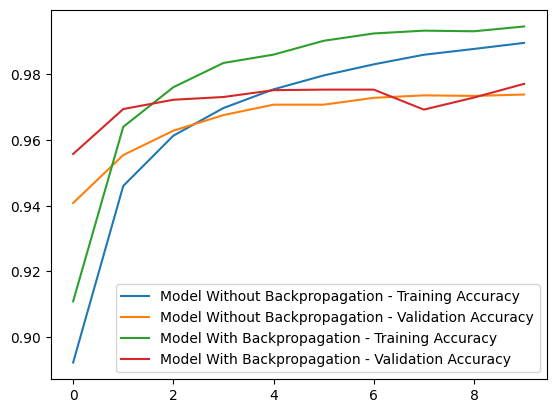

In [ ]:
plt.plot(modelNoBackprop.history['accuracy'], label='Model Without Backpropagation - Training Accuracy')
plt.plot(modelNoBackprop.history['val_accuracy'], label='Model Without Backpropagation - Validation Accuracy')
plt.plot(modelWithBackprop.history['accuracy'], label='Model With Backpropagation - Training Accuracy')
plt.plot(modelWithBackprop.history['val_accuracy'], label='Model With Backpropagation - Validation Accuracy')
plt.legend()
plt